# Target 

    In the Last architecture we are able to achive 99.24% test accuracy without overfitting, now we need to work on boosting this model performace, the very first step is to ensure the pooling layer and transition block are on correct place , so we will modify the architecture accordingly and try to achive more than last time 

# Result  

    Just by changing the maxpooling and transition block location, we also faced some challenged like playing with the parameters since in starting the architecture was slightly different and we are also able to reduce the parameters because of this change which is even better 
    test_accuracy -> 99.34%
    train_accuracy -> 99.17%
    pramaeters -> 7,824

# Analysis  

    Since we modified the architecture on this stange we now have 7,824 parameters in our model, in all the architectures before this we were applying maxpooling after 7x7 receptive field, but now it is after 5x5 because of this change the convolution block parameters which comes after transition block changes and we end up by having less parameters in the model with boosted accuracy, from here we can have a learning that correct position of pooling and transition can lead much better results 

In [1]:
# Initialized Logger
import torch
import torch.optim as optim
from torchvision import datasets
from torchsummary import summary
from model import Net
from utils import data_transformation,get_device, \
                  fit_model, plot_accuracy_report, \
                  show_random_results, plot_misclassified, \
                  calculate_accuracy_per_class

CODE BLOCK: 2

In [2]:
# CUDA?
device = get_device()
print("Available Device :: ", device)

INFO:utils:device: cuda


Available Device ::  cuda


CODE BLOCK: 3

In [3]:
transformation_matrix = {
                         "mean_of_data":(0.1307,),
                         "std_of_data": (0.3081,)
                         }

dataloader_kwargs = {'batch_size': 64, 'shuffle': True, 'num_workers': 1, 'pin_memory': True}


train_transforms, test_transforms = data_transformation(transformation_matrix)
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

train_loader = torch.utils.data.DataLoader(train_data, **dataloader_kwargs)
test_loader = torch.utils.data.DataLoader(test_data, **dataloader_kwargs)

INFO:utils:transformation Details ::: 


100%|██████████| 9912422/9912422 [00:00<00:00, 174370625.06it/s]


Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 95307390.89it/s]


Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 136115479.47it/s]

Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 22333562.45it/s]


Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



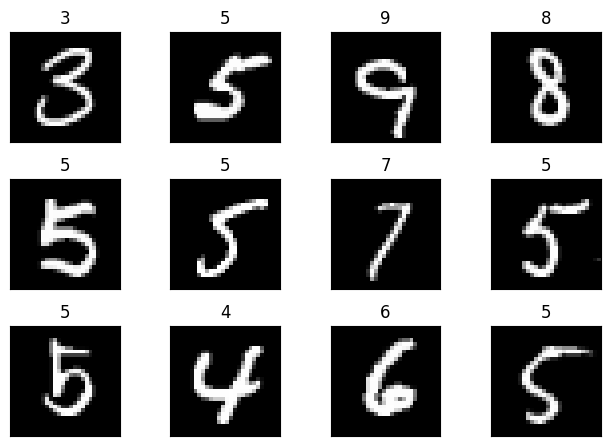

In [4]:
import matplotlib.pyplot as plt

batch_data, batch_label = next(iter(train_loader))

fig = plt.figure()

for i in range(12):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(batch_data[i].squeeze(0), cmap='gray')
  plt.title(batch_label[i].item())
  plt.xticks([])
  plt.yticks([])

In [5]:
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 4, 26, 26]              36
              ReLU-2            [-1, 4, 26, 26]               0
       BatchNorm2d-3            [-1, 4, 26, 26]               8
           Dropout-4            [-1, 4, 26, 26]               0
            Conv2d-5           [-1, 10, 24, 24]             360
              ReLU-6           [-1, 10, 24, 24]               0
       BatchNorm2d-7           [-1, 10, 24, 24]              20
           Dropout-8           [-1, 10, 24, 24]               0
         MaxPool2d-9           [-1, 10, 12, 12]               0
           Conv2d-10            [-1, 8, 12, 12]              80
             ReLU-11            [-1, 8, 12, 12]               0
      BatchNorm2d-12            [-1, 8, 12, 12]              16
          Dropout-13            [-1, 8, 12, 12]               0
           Conv2d-14            [-1, 4,

In [6]:
training_parameters = {"learning_rate":0.01,
                       "momentum":0.9,
                       "num_epochs":15
                       }
train_losses, test_losses, train_acc, test_acc = fit_model(model,training_parameters,train_loader,test_loader,device)

Epoch 1


Train: Loss=0.0383 Batch_id=937 Accuracy=93.07: 100%|██████████| 938/938 [00:23<00:00, 40.25it/s]


Test set: Average loss: 0.0526, Accuracy: 9851/10000 (98.51%)

Epoch 2


Train: Loss=0.1407 Batch_id=937 Accuracy=97.92: 100%|██████████| 938/938 [00:22<00:00, 41.08it/s]


Test set: Average loss: 0.0434, Accuracy: 9850/10000 (98.50%)

Epoch 3


Train: Loss=0.0186 Batch_id=937 Accuracy=98.41: 100%|██████████| 938/938 [00:23<00:00, 39.79it/s]


Test set: Average loss: 0.0331, Accuracy: 9896/10000 (98.96%)

Epoch 4


Train: Loss=0.0137 Batch_id=937 Accuracy=98.53: 100%|██████████| 938/938 [00:23<00:00, 40.24it/s]


Test set: Average loss: 0.0319, Accuracy: 9901/10000 (99.01%)

Epoch 5


Train: Loss=0.1087 Batch_id=937 Accuracy=98.61: 100%|██████████| 938/938 [00:23<00:00, 39.86it/s]


Test set: Average loss: 0.0287, Accuracy: 9913/10000 (99.13%)

Epoch 6


Train: Loss=0.0038 Batch_id=937 Accuracy=98.82: 100%|██████████| 938/938 [00:23<00:00, 40.68it/s]


Test set: Average loss: 0.0264, Accuracy: 9917/10000 (99.17%)

Epoch 7


Train: Loss=0.0015 Batch_id=937 Accuracy=98.89: 100%|██████████| 938/938 [00:23<00:00, 39.98it/s]


Test set: Average loss: 0.0332, Accuracy: 9896/10000 (98.96%)

Epoch 8


Train: Loss=0.0358 Batch_id=937 Accuracy=98.98: 100%|██████████| 938/938 [00:23<00:00, 40.09it/s]


Test set: Average loss: 0.0246, Accuracy: 9917/10000 (99.17%)

Epoch 9


Train: Loss=0.0050 Batch_id=937 Accuracy=98.99: 100%|██████████| 938/938 [00:23<00:00, 39.79it/s]


Test set: Average loss: 0.0265, Accuracy: 9910/10000 (99.10%)

Epoch 10


Train: Loss=0.0079 Batch_id=937 Accuracy=99.02: 100%|██████████| 938/938 [00:23<00:00, 39.95it/s]


Test set: Average loss: 0.0252, Accuracy: 9926/10000 (99.26%)

Epoch 11


Train: Loss=0.0018 Batch_id=937 Accuracy=99.11: 100%|██████████| 938/938 [00:23<00:00, 39.98it/s]


Test set: Average loss: 0.0242, Accuracy: 9921/10000 (99.21%)

Epoch 12


Train: Loss=0.0088 Batch_id=937 Accuracy=99.08: 100%|██████████| 938/938 [00:23<00:00, 39.95it/s]


Test set: Average loss: 0.0232, Accuracy: 9925/10000 (99.25%)

Epoch 13


Train: Loss=0.0829 Batch_id=937 Accuracy=99.11: 100%|██████████| 938/938 [00:23<00:00, 40.02it/s]


Test set: Average loss: 0.0216, Accuracy: 9935/10000 (99.35%)

Epoch 14


Train: Loss=0.1407 Batch_id=937 Accuracy=99.17: 100%|██████████| 938/938 [00:23<00:00, 40.46it/s]


Test set: Average loss: 0.0227, Accuracy: 9934/10000 (99.34%)

Epoch 15


Train: Loss=0.0025 Batch_id=937 Accuracy=99.12: 100%|██████████| 938/938 [00:23<00:00, 40.36it/s]


Test set: Average loss: 0.0219, Accuracy: 9927/10000 (99.27%)



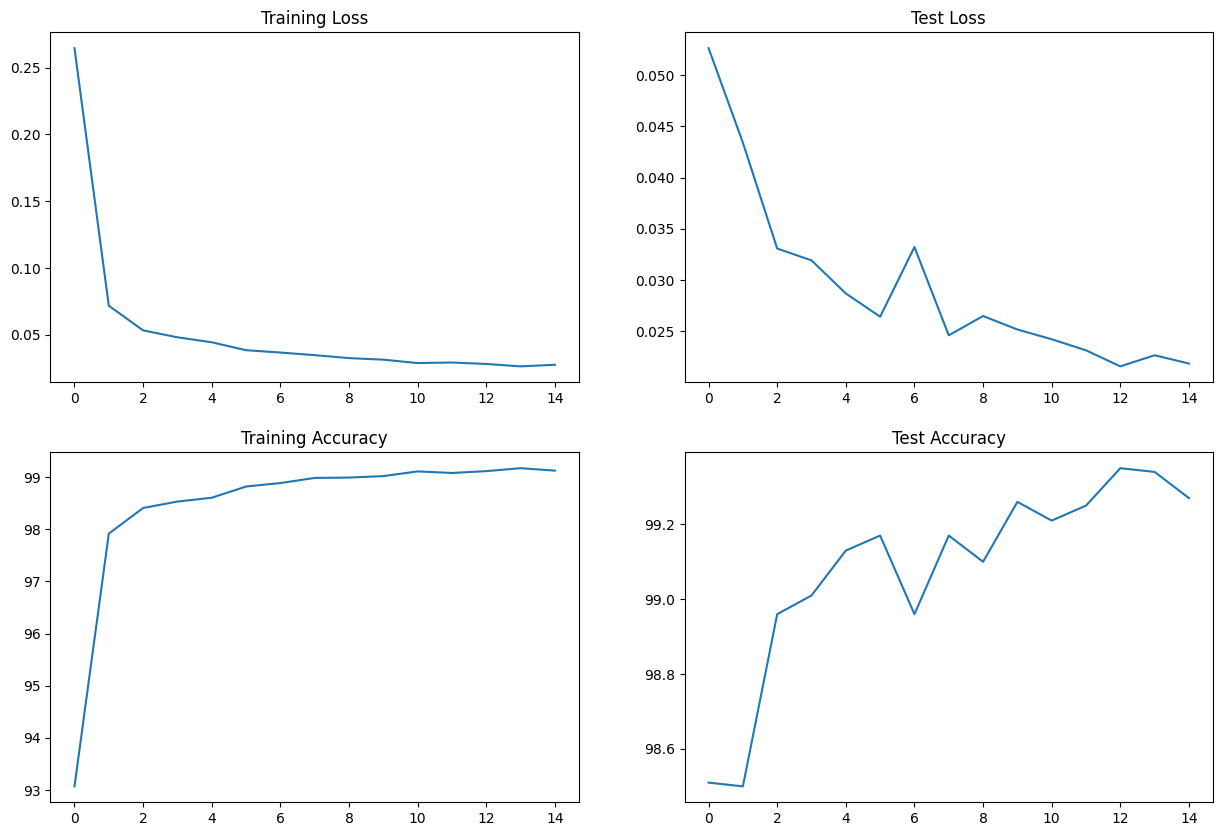

In [7]:
plot_accuracy_report(train_losses, test_losses, train_acc, test_acc)

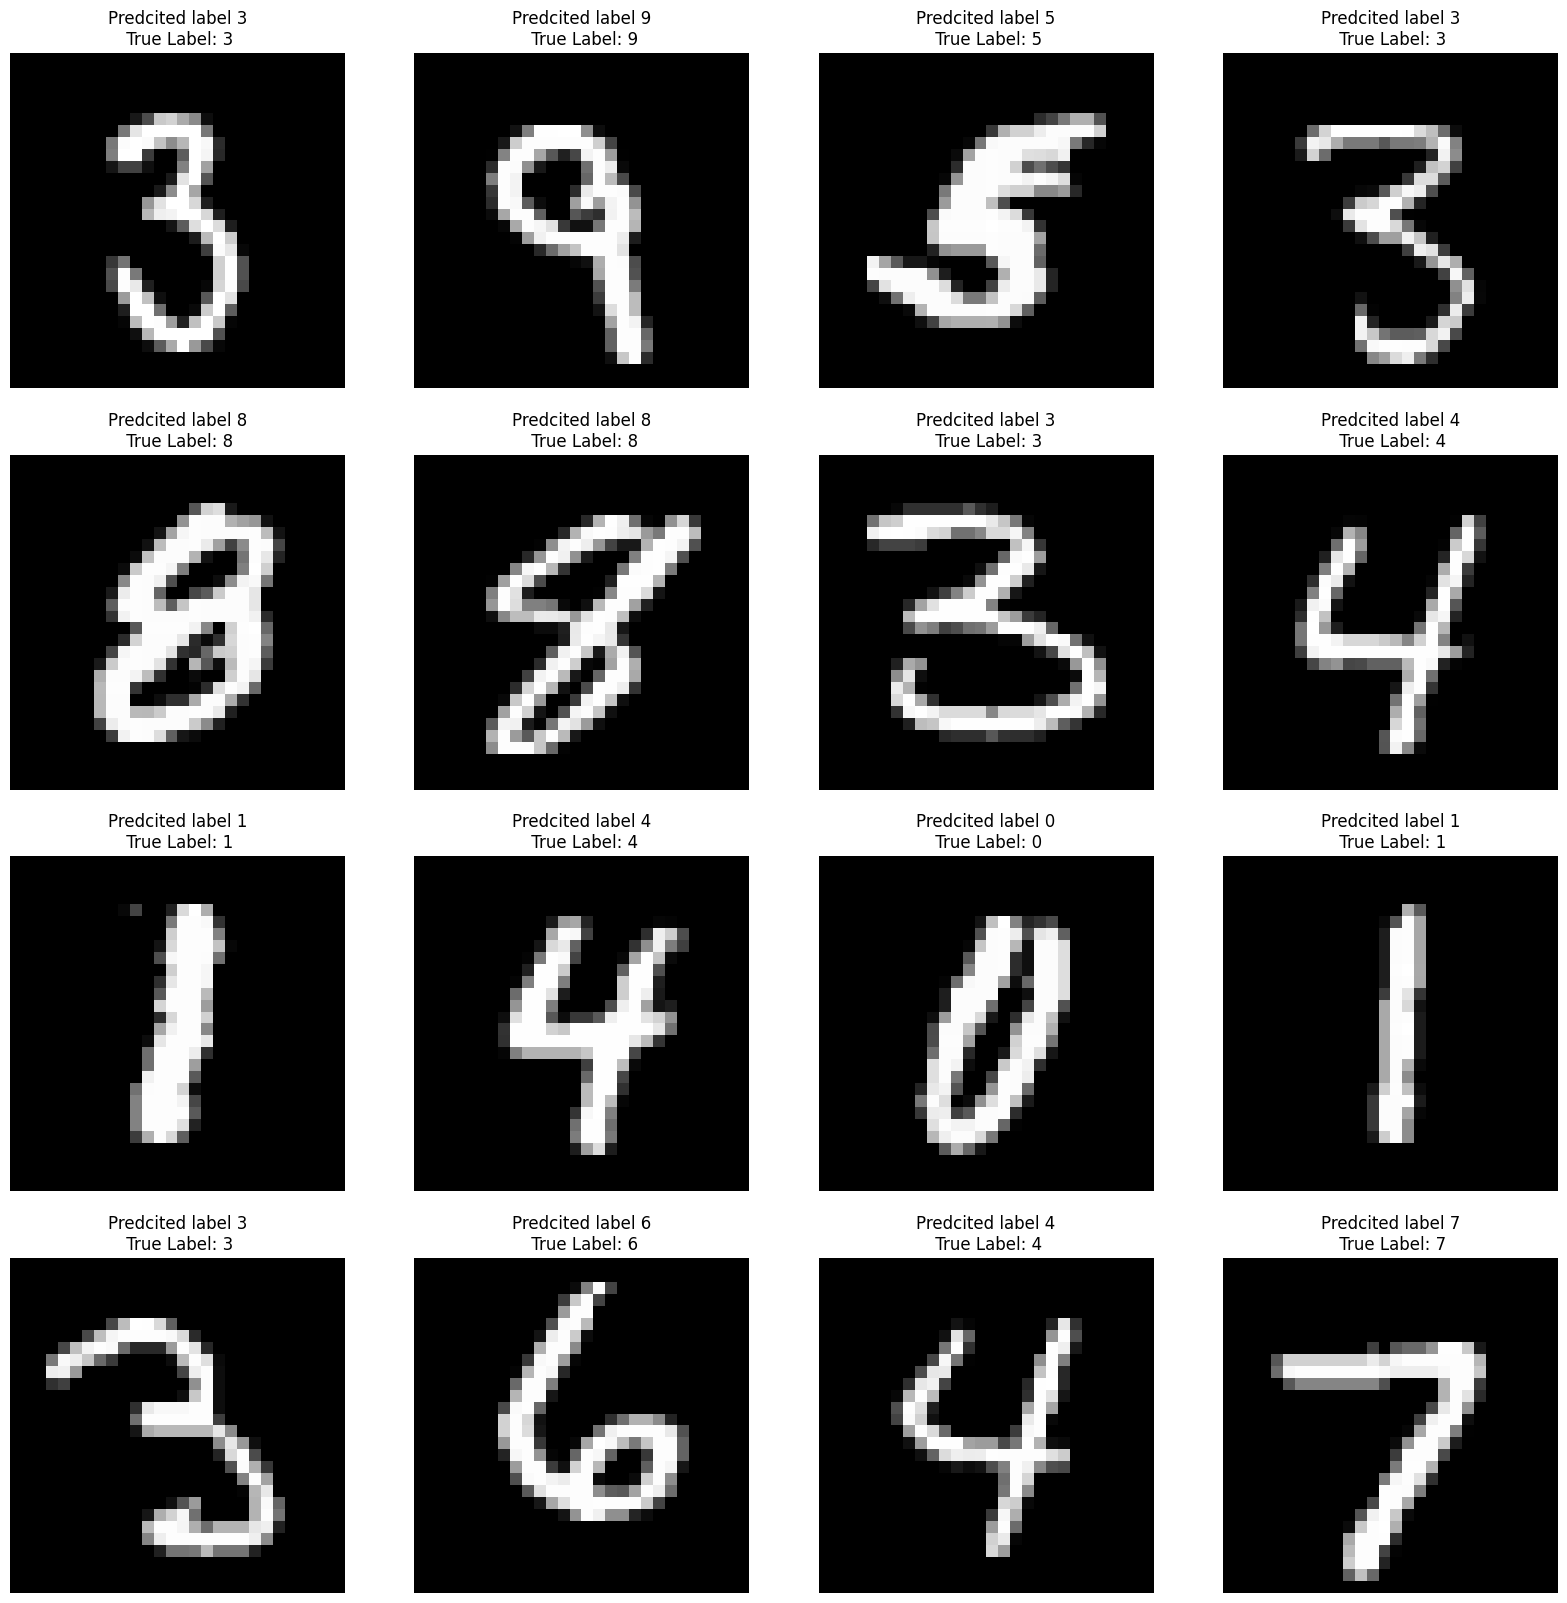

In [8]:
grid_size = (4,4)
show_random_results(test_loader,grid_size,model,device)

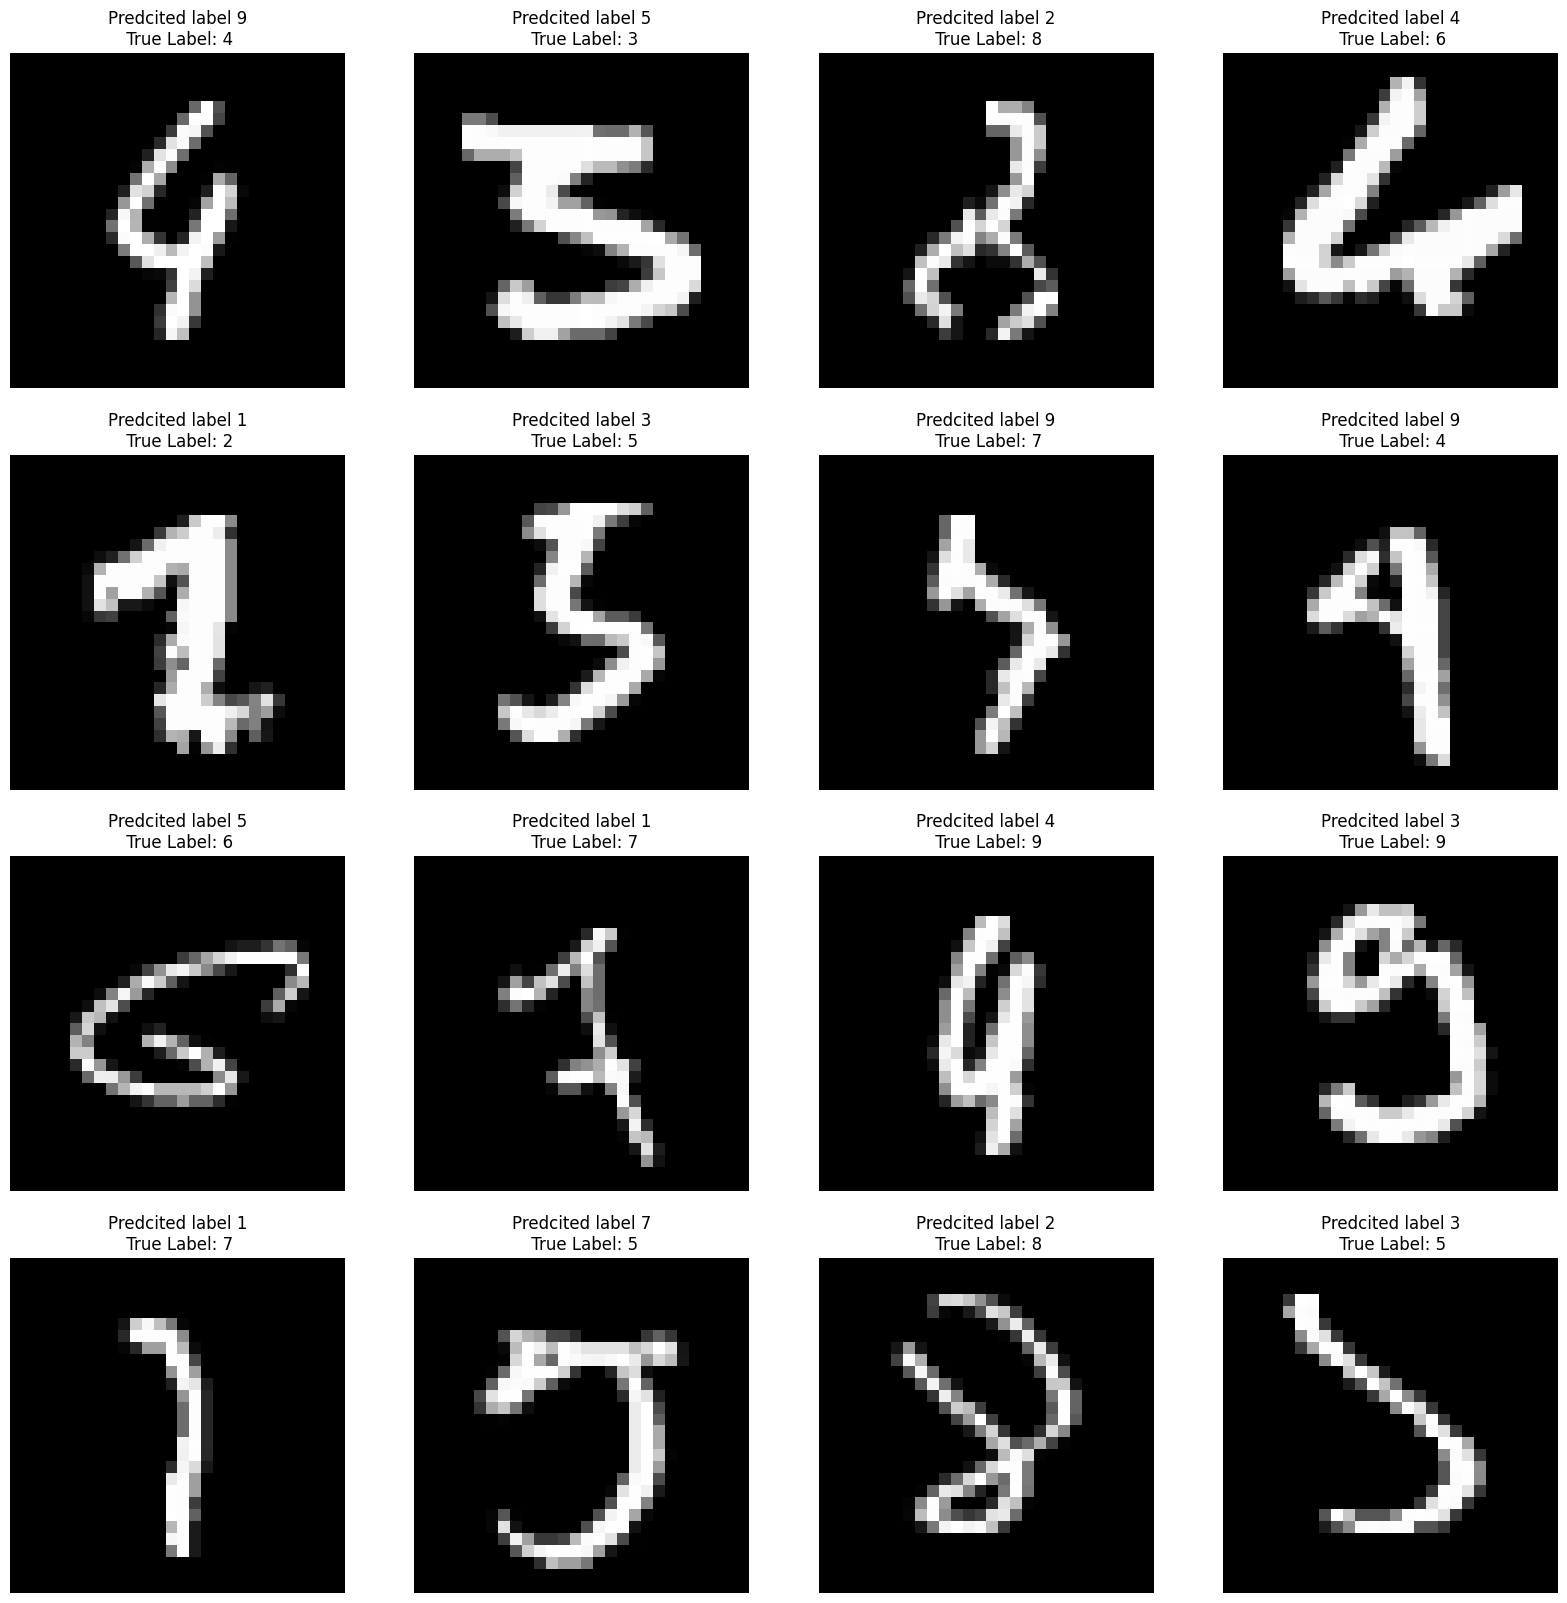

In [9]:
grid_size = (4,4)
plot_misclassified(model,grid_size,test_loader,device)

Accuracy of 0 - zero : 98 %
Accuracy of 1 - one : 100 %
Accuracy of 2 - two : 97 %
Accuracy of 3 - three : 100 %
Accuracy of 4 - four : 98 %
Accuracy of 5 - five : 98 %
Accuracy of 6 - six : 98 %
Accuracy of 7 - seven : 99 %
Accuracy of 8 - eight : 98 %
Accuracy of 9 - nine : 99 %


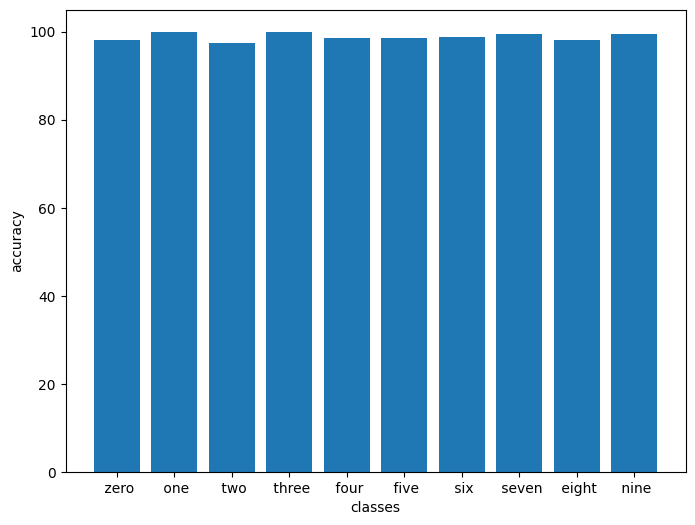

In [10]:
calculate_accuracy_per_class(model,device,test_loader,test_data)